In [22]:
import numpy as np 
import keras 
from keras.models import Sequential#sequential = a linear stack of layers
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

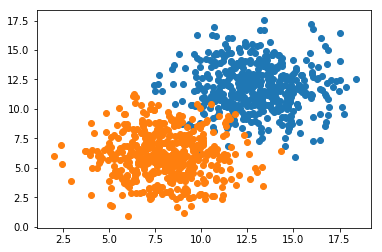

In [23]:
 n_pts = 500
 np.random.seed(0)
 Xa = np.array([np.random.normal(13, 2, n_pts),
                np.random.normal(12, 2, n_pts)]).T
 Xb = np.array([np.random.normal(8, 2, n_pts),
                np.random.normal(6, 2, n_pts)]).T
     
 X = np.vstack((Xa, Xb))
 y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T
     
 plt.scatter(X[:n_pts,0], X[:n_pts,1])
 plt.scatter(X[n_pts:,0], X[n_pts:,1])

In [24]:
model = Sequential()
model.add(Dense(units = 1, input_shape = (2,), activation = 'sigmoid'))
adam = Adam(lr = 0.1)
model.compile(adam, loss = 'binary_crossentropy', metrics = ['accuracy'])
#passing in the corresponding labels = distiguish which points belong to which class
h = model.fit(x = X, y = y , verbose = 1 , batch_size = 50, epochs = 500, shuffle = 'true') #define training data by label, verbose displays progress bar


Epoch 1/500
1000/1000 [==============================] - 0s 125us/step - loss: 1.4227 - acc: 0.5550
Epoch 2/500
1000/1000 [==============================] - 0s 18us/step - loss: 0.6247 - acc: 0.6120
Epoch 3/500
1000/1000 [==============================] - 0s 22us/step - loss: 0.4458 - acc: 0.8290
Epoch 4/500
1000/1000 [==============================] - 0s 24us/step - loss: 0.3837 - acc: 0.8950
Epoch 5/500
1000/1000 [==============================] - 0s 17us/step - loss: 0.3406 - acc: 0.9050
Epoch 6/500
1000/1000 [==============================] - 0s 22us/step - loss: 0.3077 - acc: 0.9270
Epoch 7/500
1000/1000 [==============================] - 0s 18us/step - loss: 0.2884 - acc: 0.9320
Epoch 8/500
1000/1000 [==============================] - 0s 20us/step - loss: 0.2609 - acc: 0.9390
Epoch 9/500
1000/1000 [==============================] - 0s 20us/step - loss: 0.2346 - acc: 0.9580
Epoch 10/500
1000/1000 [==============================] - 0s 24us/step - loss: 0.2190 - acc: 0.9630
Epoch 11

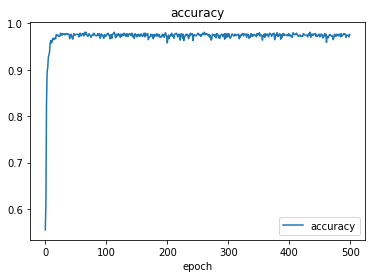

In [25]:
plt.plot(h.history['acc'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'])

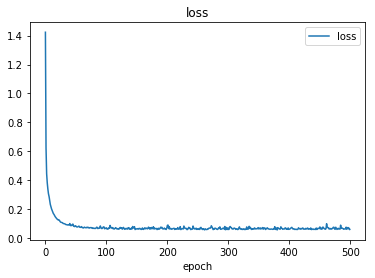

In [26]:
plt.plot(h.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['loss'])

In [32]:
def plot_decision_boundary(X, y,model):
    x_span = np.linspace(min(X[:, 0]) -1,max(X[:, 0]) +1)
    y_span = np.linspace(min(X[:, 1]) -1,max(X[:, 1]) +1)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_,yy_]
    print(grid)
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape) # reshape to match the cooridnates of every single point in the grid
    plt.contourf(xx,yy,z)

[[ 1.01077428 -0.08247762]
 [ 1.38591048 -0.08247762]
 [ 1.76104668 -0.08247762]
 ...
 [18.6421757  18.51871023]
 [19.0173119  18.51871023]
 [19.39244811 18.51871023]]


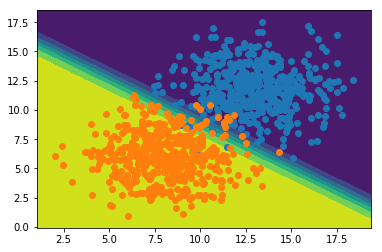

In [33]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
#contour zones represent different probabilities

[[ 1.01077428 -0.08247762]
 [ 1.38591048 -0.08247762]
 [ 1.76104668 -0.08247762]
 ...
 [18.6421757  18.51871023]
 [19.0173119  18.51871023]
 [19.39244811 18.51871023]]
Prediction is: [[0.9999856]]


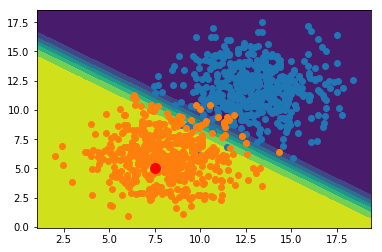

In [36]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
x = 7.5
y = 5
point = np.array([[x ,y]])
prediction = model.predict(point)
plt.plot([x], [y], marker = "o", markersize = 10, color = "red")
print("Prediction is:", prediction)